The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behavior against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#print all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#increase columns that can be printed to 300
pd.set_option('display.max_columns', 300)

In [3]:
BF=pd.read_csv("black_friday.csv")
BF.info()
BF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#(Part b) Use groupby() to count the number of transactions with 'Stay_In_Current_City_Years' equal to A and 'Age' range of 0-17. What is the number of transactions? 

BF[["Age", "City_Category", "Purchase"]].groupby(["Age", "City_Category"]).count()


Purchase
Age   City_Category          
0-17  A                  2497
      B                  5288
      C                  6922
18-25 A                 27025
      B                 42470
      C                 28139
26-35 A                 72048
      B                 89767
      C                 52875
36-45 A                 26142
      B                 46605
      C                 34752
46-50 A                  7467
      B                 19900
      C                 17159
51-55 A                  5969
      B                 17435
      C                 14214
55+   A                  3490
      B                  5028
      C                 12385

In [5]:
#Better options for filtering 

a=BF[BF.City_Category=="A"][BF.Age=="0-17"] #filters nicely

#confirm filters worked.
a.Age.unique()
a.City_Category.unique()

#BF.where(BF['City_Category']=='A') #this is fine as long as I drop na after but I would rather have a cleaner method

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


array(['0-17'], dtype=object)

array(['A'], dtype=object)

In [6]:
#(Part b) Drop all the insignificant columns from the dataframe. In the resulting dataframe what data transformation should be applied on column Gender? Apply the appropriate transformation on this column.

#columns to drop: User_ID, Product_ID because these arent really helpful in a regression.
BF.columns
BF.info()
BF.head()

#When using drop: 
#axis=1 says drop columns, not rows.
#if inplace=False (default), you are creating a copy of the data with the action performed, so you need to assign that copy to a new variable.
#if inplace=True, you change the existing version, so no need to assign a variable.
BF.drop(['User_ID', 'Product_ID'], axis=1, inplace=True) 
BF.columns

#Now fix Gender
BF['Gender'].head()
BF['Gender'].unique()

BF['Gender']=BF['Gender'].map({'F':1, 'M':0}).astype(int)

BF['Gender'].unique()




Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

0    F
1    F
2    F
3    F
4    M
Name: Gender, dtype: object

array(['F', 'M'], dtype=object)

array([1, 0])

In [7]:
#Part b) In the resulting dataframe what data transformation should be applied on column Age? Apply the appropriate transformation on this column.

BF['Age'].unique()
BF['Age'].nunique()


#this is an ordered variable. for ordinal, recode with numerical order. 
#you could do num of years in school, or just 1=hs,2=bach,3=msters
BF['Age']=BF['Age'].map({'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}).astype(int)

BF.head(15)



array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

7

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,A,2,0,3,NaN,NaN,8370
1,1,0,10,A,2,0,1,6.0,14.0,15200
2,1,0,10,A,2,0,12,NaN,NaN,1422
3,1,0,10,A,2,0,12,14.0,NaN,1057
4,0,6,16,C,4+,0,8,NaN,NaN,7969
5,0,2,15,A,3,0,1,2.0,NaN,15227
6,0,4,7,B,2,1,1,8.0,17.0,19215
7,0,4,7,B,2,1,1,15.0,NaN,15854
8,0,4,7,B,2,1,1,16.0,NaN,15686
9,0,2,20,A,1,1,8,NaN,NaN,7871


In [8]:
#Q7 (Part b) In the resulting dataframe what data transformation should be applied on column Occupation? Apply the appropriate transformation on this column.

BF['Occupation'].head()
BF['Occupation'].unique()
BF['Occupation'].nunique()

#will need one-hot encoding.
dums=pd.get_dummies(BF['Occupation'], columns='Occupation', prefix='Occupation')

dums.head()

BF=pd.concat([BF, dums], axis=1)
BF.head()


0    10
1    10
2    10
3    10
4    16
Name: Occupation, dtype: int64

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

21

,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,1,0,10,A,2,0,3,NaN,NaN,8370,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,10,A,2,0,1,6.0,14.0,15200,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,10,A,2,0,12,NaN,NaN,1422,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,10,A,2,0,12,14.0,NaN,1057,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,6,16,C,4+,0,8,NaN,NaN,7969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [9]:

#(Part b)  In the resulting dataframe what data transformation should be applied on column City_Category? Apply the appropriate transformation on this column.

BF['City_Category'].head()
BF['City_Category'].unique()

#will need one-hot encoding.
dums=pd.get_dummies(BF['City_Category'], columns='City_Category', prefix='City_Category')

dums.head()

BF=pd.concat([BF, dums], axis=1)
BF.head()

0    A
1    A
2    A
3    A
4    C
Name: City_Category, dtype: object

array(['A', 'C', 'B'], dtype=object)

,City_Category_A,City_Category_B,City_Category_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_A,City_Category_B,City_Category_C
0,1,0,10,A,2,0,3,NaN,NaN,8370,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,10,A,2,0,1,6.0,14.0,15200,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,10,A,2,0,12,NaN,NaN,1422,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,10,A,2,0,12,14.0,NaN,1057,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,6,16,C,4+,0,8,NaN,NaN,7969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [10]:
#(Part b)  In the resulting dataframe what data transformation should be applied on column Marital_Status? Apply the appropriate transformation on this column.

BF['Marital_Status'].head()
BF['Marital_Status'].unique()

#Marital status is already binary 0/1 with integer datatype. no change needed.

0    0
1    0
2    0
3    0
4    0
Name: Marital_Status, dtype: int64

array([0, 1])

In [11]:
#(Part b)  In the resulting dataframe what data transformation should be applied on column Stay_In_Current_City_Years? Apply the appropriate transformation on this column.
BF['Stay_In_Current_City_Years'].head()
BF['Stay_In_Current_City_Years'].unique()

#this is an ordered variable. for ordinal, recode with numerical order. 
#you could do num of years in school, or just 1=hs,2=bach,3=msters
#By using .fillna(), I can recode only the 1 value thats wrong, rather than all column values
BF['Stay_In_Current_City_Years']=BF['Stay_In_Current_City_Years'].map({'4+':4}).fillna(BF['Stay_In_Current_City_Years']).astype(int)

BF['Stay_In_Current_City_Years'].head()

0     2
1     2
2     2
3     2
4    4+
Name: Stay_In_Current_City_Years, dtype: object

array(['2', '4+', '3', '1', '0'], dtype=object)

0    2
1    2
2    2
3    2
4    4
Name: Stay_In_Current_City_Years, dtype: int64

In [12]:
#(Part b) In the resulting dataframe what data transformation should be applied on column Product_Category_1? Apply the appropriate transformation on this column.
BF['Product_Category_1'].unique()
BF['Product_Category_1'].nunique()

#This has product categories (no order) represented by numbers, so one-hot encoding is needed.
dums=pd.get_dummies(BF['Product_Category_1'], columns='Product_Category_1', prefix='Product_Category_1')

dums.head()

BF=pd.concat([BF, dums], axis=1)
BF.head()


array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

18

,Product_Category_1_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_A,City_Category_B,City_Category_C,Product_Category_1_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18
0,1,0,10,A,2,0,3,NaN,NaN,8370,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,10,A,2,0,1,6.0,14.0,15200,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,10,A,2,0,12,NaN,NaN,1422,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,10,A,2,0,12,14.0,NaN,1057,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,6,16,C,4,0,8,NaN,NaN,7969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [13]:
#(Part b)  In the resulting dataframe what data transformation should be applied on column Product_Category_2? Delete this column from the dataframe.
BF['Product_Category_2'].unique()
BF['Product_Category_2'].nunique()

#this would be replaced with a one-hot vector.  
#nunique says there are 17 unique values here, but there are 18 when you count nan, which we should do.
#the fact that a value is missing is information in and of itself in some circumstances.


#When using drop: 
#axis=1 says drop columns, not rows.
#if inplace=False (default), you are creating a copy of the data with the action performed, so you need to assign that copy to a new variable.
#if inplace=True, you change the existing version, so no need to assign a variable.
BF.drop(['Product_Category_2'], axis=1, inplace=True) 
BF.columns


array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

17

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_3', 'Purchase', 'Occupation_0', 'Occupation_1',
       'Occupation_2', 'Occupation_3', 'Occupation_4', 'Occupation_5',
       'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9',
       'Occupation_10', 'Occupation_11', 'Occupation_12', 'Occupation_13',
       'Occupation_14', 'Occupation_15', 'Occupation_16', 'Occupation_17',
       'Occupation_18', 'Occupation_19', 'Occupation_20', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Product_Category_1_1',
       'Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_1_5', 'Product_Category_1_6', 'Product_Category_1_7',
       'Product_Category_1_8', 'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
     

In [14]:
#(Part b) In the resulting dataframe what data transformation should be applied on column Product_Category_3? Delete this column from the dataframe.
BF['Product_Category_3'].unique()
BF['Product_Category_3'].nunique()

#this would be replaced with a one-hot vector.  
#nunique says there are 15 unique values here, but there are 16 when you count nan, which we should do.
#the fact that a value is missing is information in and of itself in some circumstances.


#When using drop: 
#axis=1 says drop columns, not rows.
#if inplace=False (default), you are creating a copy of the data with the action performed, so you need to assign that copy to a new variable.
#if inplace=True, you change the existing version, so no need to assign a variable.
BF.drop(['Product_Category_3'], axis=1, inplace=True) 
BF.columns

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

15

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase', 'Occupation_0', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'Occupation_6',
       'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_20', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'Product_Category_1_1', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_1_5',
       'Product_Category_1_6', 'Product_Category_1_7', 'Product_Category_1_8',
       'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_

In [15]:
#For columns where we've created a one-hot vector, delete the original column
BF.drop(['Occupation', 'City_Category', 'Product_Category_1'], axis=1, inplace=True) 


In [16]:
BF.columns
BF.shape

Index(['Gender', 'Age', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Purchase', 'Occupation_0', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'Occupation_6',
       'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_20', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'Product_Category_1_1', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_1_5',
       'Product_Category_1_6', 'Product_Category_1_7', 'Product_Category_1_8',
       'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17'

(537577, 47)

In [17]:
BF.head()

,Gender,Age,Stay_In_Current_City_Years,Marital_Status,Purchase,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_A,City_Category_B,City_Category_C,Product_Category_1_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18
0,1,0,2,0,8370,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,2,0,15200,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,2,0,1422,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,2,0,1057,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,6,4,0,7969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [18]:
X=BF.as_matrix(['Gender', 'Age',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Occupation_0', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'Occupation_6',
       'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_20', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'Product_Category_1_1', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_1_5',
       'Product_Category_1_6', 'Product_Category_1_7', 'Product_Category_1_8',
       'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18'])
y=BF['Purchase']

X.shape

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


(537577, 46)

In [19]:
from sklearn.model_selection import train_test_split

#train data is 75% of the data.
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_orig.shape
X_test_orig.shape
y_train.shape
y_test.shape

X_train_orig

(403182, 46)

(134395, 46)

(403182,)

(134395,)

array([[0, 1, 4, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 4, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 6, 0, ..., 0, 0, 0]])

In [20]:
#Use StandardScaler to scale the train and test datasets. What is the average of column age after scaling in the train dataset? (Enter the value in the following format 1.234E-56)

#sc.transform: Performs standardization by centering and scaling
#sc.fit_transform: Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X
#why do we use sc.transform on test but sc.fit_transform on train?
sc = StandardScaler()
X_train = sc.fit_transform(X_train_orig) #fit_transform is equivalent to first doing sc.fit() followed by sc.transform()

#we dont want to use sc.fit on the test data set
X_test = sc.transform(X_test_orig)

X_train


#if we took the average before splitting test and train data then the train data would influence the test data
#so the mean has to be taken after the split
#on the train data we find mean & st dev using fit and then transform values
#on test values, still need to transform, and probably want to use the mean and st dev from the train data to do it
#but how does the above code cause X_test to be transformed using X_train's mean and st dev?

array([[-0.57023399, -1.10498107,  1.65778753, ..., -0.13490976,
        -0.03182727, -0.07596028],
       [-0.57023399, -1.10498107, -0.66779715, ..., -0.13490976,
        -0.03182727, -0.07596028],
       [ 1.75366607, -1.10498107, -0.66779715, ..., -0.13490976,
        -0.03182727, -0.07596028],
       ...,
       [ 1.75366607,  1.11138713, -0.66779715, ..., -0.13490976,
        -0.03182727, -0.07596028],
       [-0.57023399, -1.10498107, -1.44299204, ..., -0.13490976,
        -0.03182727, -0.07596028],
       [-0.57023399,  2.58896593, -1.44299204, ..., -0.13490976,
        -0.03182727, -0.07596028]])

In [21]:
#X_train[:,0] #this is the first column
#Age is the 2nd column, so index=1:
Ages=X_train[:,1]
np.average(Ages)

-1.482830726244099e-16

In [22]:
#setting overall seed to 0 so I get the HW answers consistent with the professors
np.random.seed(0)


In [23]:
#(Part b) Fit LinearRegression on train dataset. What is the train score? (4 significant digits)
#(Part b) What is the test score? (4 significant digits)

from sklearn.linear_model import LinearRegression

#lin reg is only model with no hyperparamaters.
#ML is always some form of cost function and it is either solved mathmatically (lin reg) or by optimizing.
#this is the best we will be able to do with lin reg, so next step is to try out and tweak other models
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.6296331163238194
0.6352797523269078


In [24]:
#(Part b) What is the intercept of LinearRegression model? (4 significant digits - 4 digits after the decimal point)

#this is intercept for the model
lreg.intercept_

#these are the W's (coefficents of the line of best fit)
lreg.coef_

9332.692418497223

array([ 1.11949203e+01,  1.30726482e+02,  1.14238300e+01, -2.94147980e+01,
       -9.79551564e+14, -8.27366195e+14, -6.34501239e+14, -5.22164486e+14,
       -9.99678163e+14, -4.34957248e+14, -5.56283434e+14, -9.15698333e+14,
       -1.56317319e+14, -3.14287331e+14, -4.48632607e+14, -4.27806464e+14,
       -6.83060944e+14, -3.47562290e+14, -6.40839592e+14, -4.32811229e+14,
       -6.19576282e+14, -7.68151922e+14, -3.23075446e+14, -3.65703528e+14,
       -7.06781109e+14, -2.27815977e+14, -2.53777713e+14, -2.37851637e+14,
        1.08800385e+15,  5.08089850e+14,  4.67670655e+14,  3.60669536e+14,
        1.11132306e+15,  4.72905218e+14,  2.03461448e+14,  1.01020639e+15,
        6.92389422e+13,  2.37021448e+14,  5.12049805e+14,  2.10830649e+14,
        2.49322811e+14,  1.31424600e+14,  2.66277524e+14,  3.29387774e+14,
        7.90418553e+13,  1.87752351e+14])

In [25]:
#(Part b) Now train a Ridge model on this dataset. 
#Use a simple for loop over the hyperparameter alpha to find the best fit. alpha in [0.01, 0.1, 1, 10], 
#and random_state = 0. 
#compare the results with train and test score of LinearRegression model. 
#Which value of alpha results in a better train and test score?


#using ridge regularization term:

from  sklearn.linear_model import Ridge

#note: Im adding values to xrange that I probably wouldnt use, but the performance was constant, so I want to see where it changes
x_range = [.000001, .000001, .00001, .0001, .001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
#x_range = [0.01, 0.1, 1, 10] #using only the x_range that the problem asks for
train_score_list = []
test_score_list = []

#for parameter values: usual convention is to follow log base 10 values. so .01, .1, 1, 10, 100 etc. and see which is best
#if this list doesnt give goood result, expand larger and smaller.  can also fill in with stuff like 5, 7, 9 etc.

#this fits the model and saves the score using all hyperparameters in x-range so we can see which is best
for alpha in x_range: 
    ridge = Ridge(alpha, random_state=0) #instantiate ridge model
    ridge.fit(X_train,y_train) #fit that model
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))
    
    
print('train scores:', train_score_list)
print('test scores:',test_score_list)

Ridge(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Ridge(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=0, solver='auto', tol=0.001)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=0, solver='auto', tol=0.001)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Ridge(alpha=100000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

train scores: [0.6296397406050112, 0.6296397406050112, 0.6296397406050112, 0.6296397406050112, 0.6296397406050112, 0.6296397406050107, 0.6296397406049823, 0.6296397406021201, 0.6296397403159042, 0.6296397117059414, 0.6296368622904013, 0.6293631173655589, 0.6102749634921991]
test scores: [0.635295865634854, 0.635295865634854, 0.6352958656347896, 0.6352958656341454, 0.6352958656277035, 0.6352958655632843, 0.6352958649190674, 0.635295858474322, 0.6352957937693555, 0.6352951209800612, 0.6352858306173856, 0.6349477885333881, 0.6152467283144039]


Text(0.5, 0, '$\\alpha$')

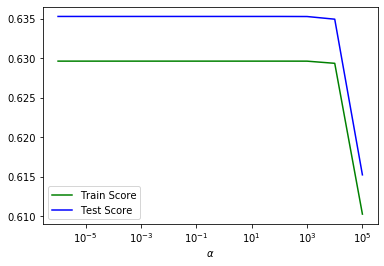

In [26]:
#this graphs accuracy scores for the ridge models with different hyperparamter values so we can see which is best
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#given that the alpha hyperparameter that is best is nearly 0, which essentially removes the penalization term of ridge 
#and results in linear regression, it seems that ridge is not the best choice for this data.

In [27]:
#now creating actual ridge model find using hyperparamter evaluation
ridge = Ridge(alpha = 0.001, random_state=0)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

#what the formating is doing?rounding to 4 dec places
#print('Test score:', format(ridge.score(X_test, y_test)))
#print('Test score:', ridge.score(X_test, y_test)) 


Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Train score: 0.6296
Test score: 0.6353


Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.021387755102040818, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.041775510204081635, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.062163265306122456, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

Ridge(alpha=0.08255102040816327, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.10293877551020408, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.12332653061224491, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.1437142857142857, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.16410204081632654, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.18448979591836737, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.20487755102040817, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.225265306122449, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.24565306122448982, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.26604081632653065, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.2864285714285714, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.30681632653061225, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.3272040816326531, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.3475918367346939, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.36797959183673473, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.3883673469387755, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.40875510204081633, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.42914285714285716, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.449530612244898, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.4699183673469388, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.49030612244897964, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.5106938775510205, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.5310816326530613, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.551469387755102, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.5718571428571428, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.5922448979591837, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.6126326530612245, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.6330204081632653, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.6534081632653062, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.673795918367347, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.6941836734693878, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.7145714285714286, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.7349591836734695, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.7553469387755103, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.775734693877551, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.7961224489795918, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.8165102040816327, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.8368979591836735, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.8572857142857143, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.8776734693877551, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.898061224489796, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.9184489795918368, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.9388367346938776, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.9592244897959185, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.9796122448979593, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=21.03807615230461, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=41.07615230460922, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=61.11422845691382, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=81.15230460921843, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=101.19038076152304, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=121.22845691382764, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=141.26653306613227, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=161.30460921843687, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=181.34268537074146, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=201.3807615230461, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=221.4188376753507, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=241.45691382765528, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=261.4949899799599, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=281.53306613226454, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=301.57114228456913, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=321.60921843687373, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=341.64729458917833, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=361.6853707414829, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=381.7234468937876, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=401.7615230460922, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=421.7995991983968, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=441.8376753507014, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=461.875751503006, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=481.91382765531057, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=501.9519038076152, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=521.9899799599198, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=542.0280561122245, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=562.0661322645291, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=582.1042084168337, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=602.1422845691383, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=622.1803607214429, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=642.2184368737475, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=662.2565130260521, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=682.2945891783567, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=702.3326653306613, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=722.3707414829659, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=742.4088176352705, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=762.4468937875752, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=782.4849699398798, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=802.5230460921844, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=822.561122244489, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=842.5991983967936, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=862.6372745490982, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=882.6753507014027, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=902.7134268537073, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=922.751503006012, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=942.7895791583165, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=962.8276553106211, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=982.8657314629259, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1002.9038076152304, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1022.941883767535, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1042.9799599198395, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1063.0180360721442, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1083.056112224449, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1103.0941883767534, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1123.1322645290581, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1143.1703406813626, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1163.2084168336673, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1183.2464929859718, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1203.2845691382765, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1223.322645290581, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1243.3607214428857, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1263.3987975951902, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1283.436873747495, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1303.4749498997996, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1323.5130260521041, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1343.5511022044088, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1363.5891783567133, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1383.627254509018, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1403.6653306613225, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1423.7034068136272, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1443.7414829659317, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1463.7795591182364, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1483.817635270541, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1503.8557114228456, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1523.8937875751503, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1543.9318637274548, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1563.9699398797595, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1584.008016032064, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1604.0460921843687, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1624.0841683366732, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1644.122244488978, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1664.1603206412824, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1684.198396793587, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1704.2364729458916, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1724.2745490981963, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1744.312625250501, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1764.3507014028055, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1784.3887775551102, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1804.4268537074147, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1824.4649298597194, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1844.503006012024, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1864.5410821643286, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1884.579158316633, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1904.6172344689378, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1924.6553106212423, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1944.693386773547, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1964.7314629258517, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1984.7695390781562, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2004.807615230461, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2024.8456913827654, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2044.88376753507, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2064.921843687375, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2084.959919839679, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2104.9979959919838, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2125.0360721442885, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2145.074148296593, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2165.112224448898, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2185.150300601202, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2205.188376753507, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2225.2264529058116, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2245.2645290581163, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2265.3026052104206, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2285.3406813627253, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2305.37875751503, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2325.4168336673347, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2345.454909819639, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2365.4929859719437, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2385.5310621242484, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2405.569138276553, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2425.607214428858, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2445.645290581162, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2465.6833667334668, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2485.7214428857715, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2505.759519038076, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2525.7975951903804, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2545.835671342685, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2565.87374749499, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2585.9118236472946, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2605.9498997995993, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2625.9879759519035, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2646.0260521042082, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2666.064128256513, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2686.1022044088177, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2706.140280561122, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2726.1783567134266, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2746.2164328657313, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2766.254509018036, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2786.2925851703408, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2806.330661322645, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2826.3687374749497, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2846.4068136272545, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2866.444889779559, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2886.4829659318634, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2906.521042084168, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2926.559118236473, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2946.5971943887776, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2966.635270541082, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=2986.6733466933865, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3006.7114228456912, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3026.749498997996, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3046.7875751503007, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3066.825651302605, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3086.8637274549096, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3106.9018036072143, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3126.939879759519, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3146.9779559118233, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3167.016032064128, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3187.0541082164327, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3207.0921843687374, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3227.130260521042, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3247.1683366733464, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3267.206412825651, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3287.244488977956, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3307.2825651302605, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3327.320641282565, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3347.3587174348695, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3367.396793587174, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3387.434869739479, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3407.472945891783, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3427.511022044088, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3447.5490981963926, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3467.5871743486973, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3487.625250501002, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3507.6633266533063, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3527.701402805611, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3547.7394789579157, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3567.7775551102204, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3587.8156312625247, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3607.8537074148294, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3627.891783567134, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3647.929859719439, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3667.9679358717435, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3688.006012024048, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3708.0440881763525, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3728.082164328657, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3748.120240480962, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3768.158316633266, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3788.196392785571, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3808.2344689378756, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3828.2725450901803, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3848.3106212424846, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3868.3486973947893, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3888.386773547094, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3908.4248496993987, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3928.4629258517034, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3948.5010020040077, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3968.5390781563124, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=3988.577154308617, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4008.615230460922, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4028.653306613226, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4048.6913827655308, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4068.7294589178355, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4088.76753507014, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4108.805611222445, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4128.84368737475, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4148.881763527054, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4168.919839679358, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4188.957915831663, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4208.9959919839675, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4229.034068136272, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4249.072144288577, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4269.110220440882, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4289.148296593186, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4309.186372745491, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4329.224448897796, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4349.2625250501, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4369.300601202404, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4389.338677354709, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4409.376753507014, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4429.4148296593185, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4449.452905811623, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4469.490981963928, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4489.529058116233, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4509.567134268537, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4529.605210420841, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4549.643286573146, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4569.6813627254505, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4589.719438877755, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4609.75751503006, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4629.795591182365, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4649.833667334669, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4669.871743486974, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4689.909819639278, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4709.947895791583, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4729.985971943887, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4750.024048096192, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4770.062124248497, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4790.100200400801, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4810.138276553106, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4830.176352705411, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4850.214428857716, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4870.252505010019, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4890.290581162324, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4910.328657314629, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4930.3667334669335, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4950.404809619238, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4970.442885771543, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=4990.480961923848, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5010.519038076152, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5030.557114228457, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5050.595190380761, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5070.633266533066, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5090.67134268537, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5110.709418837675, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5130.74749498998, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5150.785571142284, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5170.823647294589, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5190.861723446894, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5210.899799599199, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5230.937875751502, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5250.975951903807, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5271.014028056112, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5291.0521042084165, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5311.090180360721, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5331.128256513026, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5351.166332665331, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5371.204408817635, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5391.24248496994, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5411.280561122244, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5431.318637274549, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5451.356713426853, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5471.394789579158, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5491.432865731463, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5511.470941883767, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5531.509018036072, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5551.547094188377, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5571.5851703406815, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5591.623246492985, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5611.66132264529, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5631.699398797595, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5651.7374749498995, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5671.775551102204, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5691.813627254509, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5711.851703406814, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5731.889779559118, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5751.927855711422, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5771.965931863727, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5792.004008016032, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5812.042084168336, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5832.080160320641, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5852.118236472946, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5872.15631262525, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5892.194388777555, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5912.23246492986, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5932.270541082164, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5952.308617234468, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5972.346693386773, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=5992.384769539078, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6012.4228456913825, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6032.460921843687, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6052.498997995992, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6072.537074148297, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6092.575150300601, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6112.613226452905, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6132.65130260521, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6152.6893787575145, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6172.727454909819, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6192.765531062124, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6212.803607214429, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6232.841683366733, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6252.879759519038, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6272.917835671343, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6292.955911823647, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6312.993987975951, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6333.032064128256, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6353.070140280561, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6373.108216432865, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6393.14629258517, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6413.184368737475, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6433.22244488978, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6453.260521042084, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6473.298597194388, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6493.336673346693, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6513.3747494989975, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6533.412825651302, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6553.450901803607, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6573.488977955912, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6593.527054108216, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6613.565130260521, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6633.603206412826, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6653.64128256513, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6673.679358717434, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6693.717434869739, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6713.755511022044, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6733.793587174348, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6753.831663326653, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6773.869739478958, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6793.907815631263, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6813.945891783566, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6833.983967935871, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6854.022044088176, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6874.0601202404805, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6894.098196392785, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6914.13627254509, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6934.174348697395, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6954.212424849699, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6974.250501002004, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=6994.288577154308, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7014.326653306613, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7034.364729458917, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7054.402805611222, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7074.440881763527, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7094.478957915831, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7114.517034068136, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7134.555110220441, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7154.593186372746, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7174.631262525049, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7194.669338677354, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7214.707414829659, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7234.7454909819635, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7254.783567134268, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7274.821643286573, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7294.859719438878, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7314.897795591182, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7334.935871743487, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7354.973947895791, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7375.012024048096, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7395.0501002004, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7415.088176352705, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7435.12625250501, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7455.164328657314, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7475.202404809619, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7495.240480961924, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7515.2785571142285, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7535.316633266532, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7555.354709418837, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7575.392785571142, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7595.4308617234465, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7615.468937875751, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7635.507014028056, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7655.545090180361, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7675.583166332665, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7695.621242484969, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7715.659318637274, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7735.6973947895785, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7755.735470941883, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7775.773547094188, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7795.811623246493, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7815.849699398797, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7835.887775551102, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7855.925851703407, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7875.963927855711, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7896.002004008015, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7916.04008016032, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7936.078156312625, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7956.116232464929, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7976.154308617234, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=7996.192384769539, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8016.230460921844, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8036.268537074148, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8056.306613226452, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8076.344689378757, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8096.3827655310615, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8116.420841683366, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8136.458917835671, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8156.496993987976, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8176.53507014028, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8196.573146292585, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8216.61122244489, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8236.649298597195, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8256.6873747495, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8276.725450901804, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8296.763527054109, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8316.801603206412, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8336.839679358716, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8356.877755511021, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8376.915831663326, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8396.95390781563, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8416.991983967935, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8437.03006012024, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8457.068136272545, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8477.10621242485, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8497.144288577154, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8517.182364729459, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8537.220440881763, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8557.258517034068, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8577.296593186373, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8597.334669338677, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8617.372745490982, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8637.410821643287, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8657.448897795592, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8677.486973947895, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8697.5250501002, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8717.563126252504, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8737.601202404809, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8757.639278557113, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8777.677354709418, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8797.715430861723, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8817.753507014027, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8837.791583166332, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8857.829659318637, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8877.867735470942, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8897.905811623246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8917.943887775551, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8937.981963927856, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8958.02004008016, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8978.058116232465, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=8998.09619238477, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9018.134268537075, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9038.172344689377, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9058.210420841682, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9078.248496993987, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9098.286573146292, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9118.324649298596, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9138.362725450901, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9158.400801603206, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9178.43887775551, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9198.476953907815, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9218.51503006012, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9238.553106212425, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9258.59118236473, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9278.629258517034, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9298.667334669339, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9318.705410821643, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9338.743486973948, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9358.781563126253, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9378.819639278556, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9398.85771543086, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9418.895791583165, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9438.93386773547, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9458.971943887775, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9479.01002004008, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9499.048096192384, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9519.086172344689, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9539.124248496993, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9559.162324649298, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9579.200400801603, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9599.238476953908, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9619.276553106212, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9639.314629258517, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9659.352705410822, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9679.390781563126, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9699.428857715431, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9719.466933867736, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9739.505010020039, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9759.543086172343, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9779.581162324648, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9799.619238476953, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9819.657314629258, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9839.695390781562, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9859.733466933867, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9879.771543086172, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9899.809619238476, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9919.847695390781, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9939.885771543086, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9959.92384769539, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=9979.961923847695, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=10000.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5, 0, '$\\alpha$')

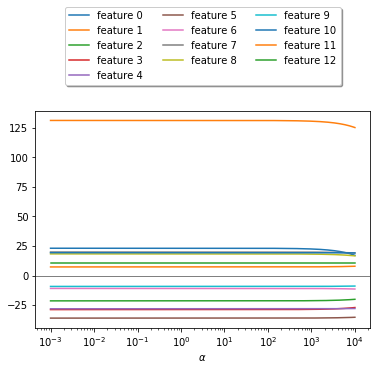

In [28]:
%matplotlib inline
import numpy as np

#linspace generates evenly space numbers between a start and stop point.
#reshape takes the values from array for to column form
x_range1 = np.linspace(0.001, 1, 50).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 500).reshape(-1,1)

#x_range then just combines these to form 1 array of both ranges
x_range = np.append(x_range1, x_range2)

coeff = []

#all of those alpha values are then used to fit a ridge model and the resulting coefficients are saved
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

#then this says for each column in the coefficient array, plot
#label says name it feature [column number]
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [29]:
#Q5 (Part b) Train a Lasso model with hyper parameters as follow: alpha = 100, random_state = 0, max_iter = 10000. How many features are used in this model to make the prediction?

#ridge model doesnt use optimizer to find result.  it is still a quadratic equation that can be solved mathmatically. uses normal equation. 
#however, lasso cant be solved mathmatically, so we need to have a max iterations be it will be solved via optimaization
#here max_iter isnt defined so default is used
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=100, random_state=0, max_iter=10000)
lasso.fit(X_train,y_train)

#looks like this performs worse than linear regression 
lasso.score(X_train,y_train)
lasso.score(X_test, y_test)

#coefficients in fitted model
#we can see from output that
X_Variable_Names=BF.columns.drop('Purchase')
coefficients = pd.concat([pd.DataFrame(X_Variable_Names),pd.DataFrame(np.transpose(lasso.coef_))], axis = 1)
coefficients

#counting non-zero coefficients (that ultimately got used in the model)
sum(x!=0 for x in list(lasso.coef_))

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

0.6219145112930258

0.6270276950308571

,0,0
0,Gender,0.000000
1,Age,19.798613
2,Stay_In_Current_City_Years,0.000000
3,Marital_Status,0.000000
4,Occupation_0,-0.000000
5,Occupation_1,-0.000000
6,Occupation_2,-0.000000
7,Occupation_3,0.000000
8,Occupation_4,-0.000000
9,Occupation_5,-0.000000


19

In [30]:
#QUESTION 6 (Part b) Use PolynomialFeatures to raise feature set to degree 2. How many features are in the transformed feature set

#polynomialFeatures is an unsupervised learning model
#changes underlying data structure. takes input and outputs dataset with higher order features included.
#degree 2 will give every variable, every variable squared, and every 2-pair interaction. same thing for higher powers.
#the default "include_bias=True" adds a feature that's constantly 1. you can avoid this by setting it equal to false.
from  sklearn.preprocessing  import PolynomialFeatures
poly = PolynomialFeatures(2) #degree=2

#this is simply adding those columns
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train.shape
X_train_poly.shape

(403182, 46)

(403182, 1128)

In [31]:
#returns variable names for the new X_train variables
#print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

#this is fitting a linear regression using all the new columns
lreg.fit(X_train_poly, y_train)

#this is scoring the new regression
train_score_list.append(lreg.score(X_train_poly, y_train))
test_score_list.append(lreg.score(X_test_poly, y_test))

train_score_list
test_score_list

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[0.6296397406050112,
 0.6296397406050112,
 0.6296397406050112,
 0.6296397406050112,
 0.6296397406050112,
 0.6296397406050107,
 0.6296397406049823,
 0.6296397406021201,
 0.6296397403159042,
 0.6296397117059414,
 0.6296368622904013,
 0.6293631173655589,
 0.6102749634921991,
 0.6336954363295516]

[0.635295865634854,
 0.635295865634854,
 0.6352958656347896,
 0.6352958656341454,
 0.6352958656277035,
 0.6352958655632843,
 0.6352958649190674,
 0.635295858474322,
 0.6352957937693555,
 0.6352951209800612,
 0.6352858306173856,
 0.6349477885333881,
 0.6152467283144039,
 -231300139769785.75]

In [32]:
#SAVING X_TRAIN AND TEST WITH NEW NAME SO I CAN CALL THEM IN LAB7 WHEN I USE THEM AGAIN
X_train_BF=X_train
y_train_BF=y_train
X_test_BF=X_test
y_test_BF=y_test

In [34]:
#Q5
#(Part b) Use PCA is to reduce the size of the feature space while retaining 95% of explained variance. 
#What is the size of the transformed feature space? (Number of features in the reduced dataset)

#last time we worked with dataset b was lab 3
#I saved dataset b X and Y matrices as X_train_BF, y_train_BF, X_test_BF, y_test_BF

from sklearn.decomposition import PCA
#Instantiate PCA 
pca = PCA(n_components=.95, random_state=0)
X_train_reduced_BF = pca.fit_transform(X_train_BF) 
X_test_reduced_BF = pca.transform(X_test_BF)

#Number of components needed to retain 95% of the variance in the original data
pca.n_components_

40

In [36]:
X_train_reduced_BF.shape

y_train_BF.shape

X_test_reduced_BF.shape

y_test_BF.shape


(403182, 40)

(403182,)

(134395, 40)

(134395,)

In [37]:
#q6
#(Part b) For the rest of this lab, we will consider reduced train and test sets. 
#For models with hyper-parameter random_state = 0. Train a RandomForestRegressor with n_estimators= 200, 
#max_features=10, and max_depth=5. What is the test score of this regressor? (4 significant digits)

from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(random_state=0, n_estimators=200, max_features=10, max_depth=5)
RFR.fit(X_train_reduced_BF, y_train_BF)

#test macro recall score
test_pred = RFR.predict(X_test_reduced_BF)

print("test R-SQUARED score: {:.5f}".format(RFR.score(X_test_reduced_BF, y_test_BF)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

test R-SQUARED score: 0.52348
